In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np
import sklearn
from sklearn import linear_model
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from matplotlib import style
import pickle

In [3]:
data = pd.read_csv("student-por.csv", sep=";")

In [4]:
data.head(100)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,GP,F,15,R,GT3,T,1,1,at_home,other,...,3,1,2,1,1,1,4,13,13,13
96,GP,M,16,R,GT3,T,4,3,services,other,...,3,3,3,1,1,4,6,9,11,11
97,GP,F,16,U,GT3,T,2,1,other,other,...,4,3,5,1,1,5,0,13,12,12
98,GP,F,16,U,GT3,T,4,4,other,other,...,5,3,4,1,2,1,4,12,13,13


In [5]:
#Numbers of students by Gender.
grouped_df = data.groupby( ["sex"] )
pd.DataFrame(grouped_df.size().reset_index(name = "Count"))

,sex,Count
0,F,383
1,M,266


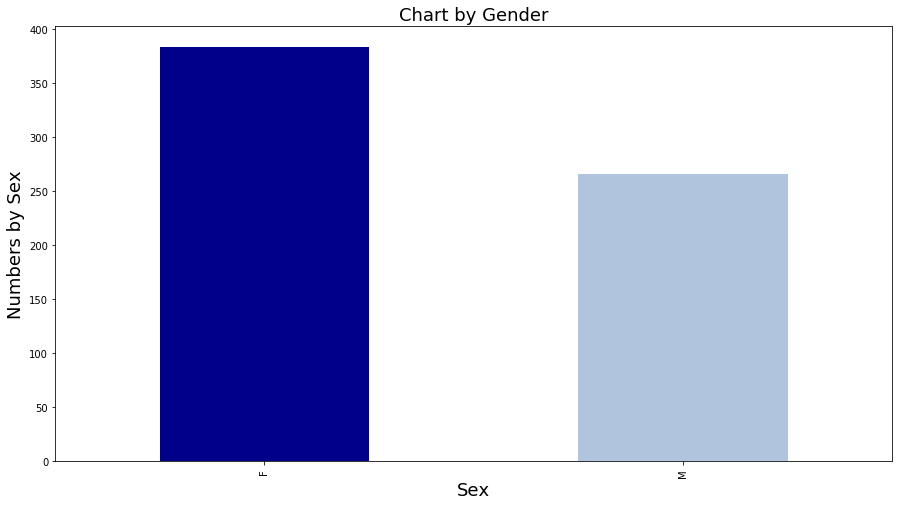

<Figure size 432x288 with 0 Axes>

In [6]:
##Barchat showing the Numbers by Gender
plt.figure(figsize=(15,8))
grouped_df = data.groupby( ["sex"] )
data.groupby(["sex"]).size().plot(kind="bar",color = ['darkblue','lightsteelblue','#00E28E','#00FF80'])

#Labeling the graph with X,Y coordinates,titles and displaying with proper layout
plt.title("Chart by Gender",fontsize=18, color='black')
plt.ylabel("Numbers by Sex",fontsize=18, color='black')
plt.xlabel("Sex",fontsize = 18, color = 'black')
plt.show()
plt.tight_layout()

In [7]:
#Numbers of students by age group.
grouped_age_df = data.groupby( ["age"] )
pd.DataFrame(grouped_age_df.size().reset_index(name = "Count"))

,age,Count
0,15,112
1,16,177
2,17,179
3,18,140
4,19,32
5,20,6
6,21,2
7,22,1


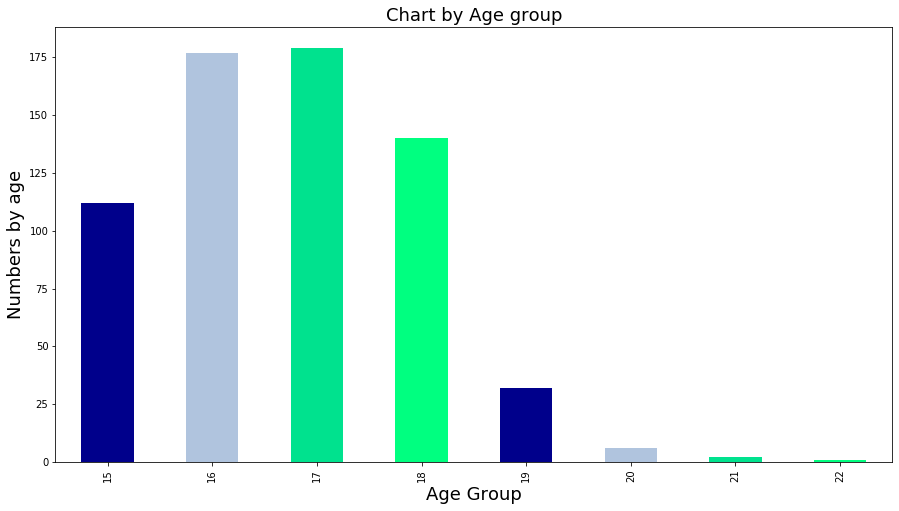

<Figure size 432x288 with 0 Axes>

In [8]:
##Barchat showing the age group
plt.figure(figsize=(15,8))
grouped_age_df = data.groupby( ["age"] )
data.groupby(["age"]).size().plot(kind="bar",color = ['darkblue','lightsteelblue','#00E28E','#00FF80'])

#Labeling the graph with X,Y coordinates,titles and displaying with proper layout
plt.title("Chart by Age group",fontsize=18, color='black')
plt.ylabel("Numbers by age",fontsize=18, color='black')
plt.xlabel("Age Group",fontsize = 18, color = 'black')
plt.show()
plt.tight_layout()

In [9]:
data = data[["G1", "G2", "G3", "studytime", "failures", "absences", "freetime"]]

In [10]:
data.head(100)

,G1,G2,G3,studytime,failures,absences,freetime
0,0,11,11,2,0,4,3
1,9,11,11,2,0,2,3
2,12,13,12,2,0,6,3
3,14,14,14,3,0,0,2
4,11,13,13,2,0,0,3
...,...,...,...,...,...,...,...
95,13,13,13,4,0,4,1
96,9,11,11,1,0,6,3
97,13,12,12,2,0,0,3
98,12,13,13,1,0,4,3


In [11]:
predict = "G3"

X = np.array(data.drop([predict], 1)) # Features
y = np.array(data[predict]) # Labels

In [12]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.1)

In [13]:
linear = linear_model.LinearRegression()

In [14]:
linear.fit(x_train, y_train)
accuracy = linear.score(x_test, y_test)  

In [15]:
print(accuracy)

0.7649602733261596


In [16]:
print('Coefficient: \n', linear.coef_) # These are each slope value
print('Intercept: \n', linear.intercept_) # This is the intercept

Coefficient: 
 [ 0.13801796  0.88124063  0.06844265 -0.12089448  0.01770165 -0.03969973]
Intercept: 
 0.1272280480161534


In [17]:
predictions = linear.predict(x_test) # Gets a list of all predictions

for x in range(len(predictions)):
    print(predictions[x], x_test[x], y_test[x])

8.861940289788642 [ 9  8  2  0 24  3] 9
11.655977112349518 [13 11  1  1 12  3] 11
8.975169075342833 [7 9 3 2 6 3] 10
8.67532563849489 [7 9 2 3 2 4] 10
11.360453788807876 [10 11  2  0  8  3] 12
15.40761253886356 [13 15  3  0  8  2] 15
11.360453788807876 [10 11  2  0  8  3] 12
13.56213661997281 [14 13  3  0  0  4] 13
11.575507262343198 [11 11  3  0  4  1] 11
10.232488811354942 [ 8 10  2  1 12  1] 10
6.26786499663237 [8 6 1 1 0 5] 0
16.48189441129858 [16 16  3  0  0  4] 16
10.096967374909312 [ 8 10  2  0  2  3] 10
14.757180383308063 [16 14  2  0  6  4] 14
13.119339829423964 [11 13  2  0  0  3] 13
9.09606355142544 [7 9 3 1 6 3] 9
13.60586299265078 [13 13  1  0 18  4] 13
16.27666508492082 [14 16  3  0  4  4] 17
9.703750977840023 [10  9  4  0  4  2] 11
9.918093359979322 [ 9 10  2  2  0  4] 11
7.9026588216526195 [ 7  8  1  3 12  4] 5
10.300264201142655 [10 10  1  0  4  4] 11
14.380462309637469 [13 14  3  0  2  3] 15
13.698667656790715 [13 13  1  0 21  3] 13
12.249056003868086 [11 12  1  0  0 

In [18]:
 print(predictions[x], x_test[x], y_test[x])

11.462367231350953 [10 11  2  0 16  4] 12
